In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
from util import get_data, plot_data
from scipy.optimize import minimize, rosen, rosen_der

%matplotlib inline

In [8]:
def compute_daily_returns(df):
    """Compute and return the daily return values."""
    daily_returns = df.copy()
    daily_returns[1:] = (df[1:] / df[:-1].values) - 1
    return daily_returns[1:]

In [9]:
def compute_portfolio_stats(prices, allocs=[0.1,0.2,0.3,0.4], rfr = 0.0, sf = 252.0):
    normed = prices / prices.ix[0]
    alloced = normed * allocs
    port_vals = alloced.sum(axis = 1)
    daily_rets = compute_daily_returns(port_vals)
    cr = port_vals[-1] / port_vals[0] - 1
    adr = daily_rets.mean()
    sddr = daily_rets.std()
    sr = (daily_rets - rfr).mean() / (daily_rets).std() * np.sqrt(sf)
    
    return cr, adr, sddr, sr

In [174]:
# This is the function that will be tested by the autograder
# The student must update this code to properly implement the functionality
def optimize_portfolio(sd=dt.datetime(2008,1,1), ed=dt.datetime(2009,1,1), \
    syms=['GOOG','AAPL','GLD','XOM'], gen_plot=False):

    # Read in adjusted closing prices for given symbols, date range
    dates = pd.date_range(sd, ed)
    prices_all = get_data(syms, dates)  # automatically adds SPY
    prices = prices_all[syms]  # only portfolio symbols
    prices_SPY = prices_all['SPY']  # only SPY, for comparison later
    
    # find the allocations for the optimal portfolio
    # note that the values here ARE NOT meant to be correct for a test case
    allocs = np.asarray([0.2, 0.2, 0.3, 0.3]) # add code here to find the allocations
    
    fun = lambda inputs: -compute_portfolio_stats(prices, inputs)[3]
    cons = ({'type':'eq', 'fun': lambda inputs: 1.0 - np.sum(inputs)})
    bnds = ((0,1),(0,1),(0,1),(0,1))
    res = minimize(fun, allocs, method='SLSQP', bounds = bnds, constraints = cons)
    allocs = res.x
    cr, adr, sddr, sr = compute_portfolio_stats(prices, allocs)

    # Get daily portfolio value    
    normed = prices / prices.ix[0]
    alloced = normed * allocs
    port_vals = alloced.sum(axis = 1)
    port_val = compute_daily_returns(port_vals) # add code here to compute daily portfolio values

    # Compare daily portfolio value with SPY using a normalized plot
    if gen_plot:
        # add code to plot here
        df_temp = pd.concat([port_vals, prices_SPY/prices_SPY[0]], keys=['Portfolio', 'SPY'], axis=1)
        plot_data(df_temp)
        pass

    return allocs, cr, adr, sddr, sr

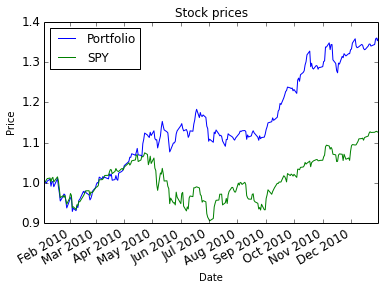

Start Date: 2010-01-01 00:00:00
End Date: 2010-12-31 00:00:00
Symbols: ['GOOG', 'AAPL', 'GLD', 'XOM']
Optimal allocations: [ -6.81464241e-16   3.96673976e-01   6.03326024e-01   1.83265987e-16]
Sharpe Ratio: 2.00401501362
Volatility (stdev of daily returns): 0.0101164586606
Average Daily Return: 0.00127711266461
Cumulative Return: 0.360093820887


In [175]:
def test_code():
    # This function WILL NOT be called by the auto grader
    # Do not assume that any variables defined here are available to your function/code
    # It is only here to help you set up and test your code

    # Define input parameters
    # Note that ALL of these values will be set to different values by
    # the autograder!

    start_date = dt.datetime(2010,1,1)
    end_date = dt.datetime(2010,12,31)
    symbols = ['GOOG', 'AAPL', 'GLD', 'XOM']

    # Assess the portfolio
    allocations, cr, adr, sddr, sr = optimize_portfolio(sd = start_date, ed = end_date,\
        syms = symbols, \
        gen_plot = True)

    # Print statistics
    print "Start Date:", start_date
    print "End Date:", end_date
    print "Symbols:", symbols
    print "Optimal allocations:", allocations
    print "Sharpe Ratio:", sr
    print "Volatility (stdev of daily returns):", sddr
    print "Average Daily Return:", adr
    print "Cumulative Return:", cr

test_code()